In [2]:
!pip3 install torch torchvision
!pip install git+https://github.com/albumentations-team/albumentations
!pip install "opencv-python-headless<4.3"
!pip install PyYAML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-7oeg3061
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-7oeg3061
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import numpy as np
import torch
from PIL import Image

from torchvision import transforms as tr
# from torchvision.transfroms import Compose

In [4]:
import albumentations as A
import cv2
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Load the drive to access the images and annotations
from google.colab import drive
drive.mount('/content/gdrive')

# reduce the path of the drive
def driveSymboLink():
  # this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
  !ln -s /content/gdrive/My\ Drive/ /mydrive
  # !ls /mydrive

driveSymboLink()

Mounted at /content/gdrive


In [6]:
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.11.0+cu113 CPU


In [7]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

WDIR='/mydrive/MIDS/W210/Animal_Identification'

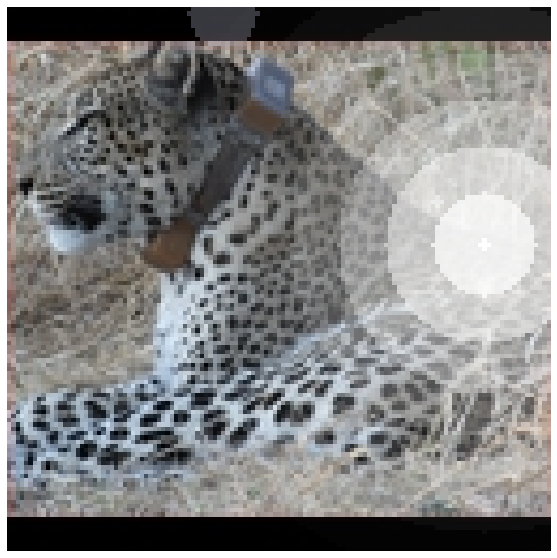

In [41]:
pathTestImg=WDIR+'/datasets/processed/leopard/train/_resized/leop_0/leop_0_001442.jpg'
image = cv2.imread(pathTestImg)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

transform = A.Compose([
                A.OneOf([
                    # A.GaussNoise(mean = 10),
                    A.RandomSunFlare(src_radius=100)
                ], p=1)
                # A.OneOf([
                    # A.MotionBlur(p=.2),
                    # A.MedianBlur(blur_limit=3, p=0.1),
                    # A.Blur(blur_limit=3, p=0.1),
                # ], p=1),
                # A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=80, p=1),
                # A.OneOf([
                #     A.PiecewiseAffine(p=0.3),
                # ], p=1),
                # A.OneOf([
                    # A.CLAHE(clip_limit=7),
                    # A.Sharpen(),
                    # A.Emboss(),
                    # A.RandomBrightnessContrast(),           
                # ], p=1),
                # A.HueSaturationValue(p=1),
                # A.Perspective(p=1)
                ])  # transforms

augmented_image = transform(image=image)['image']

visualize(augmented_image)